In [21]:
import pandas as pd

full_df = pd.read_csv(r"D:\Projects_25\Sentiment_analysis\senti\Datasets\eng_dataset_16L.csv", encoding= 'ISO-8859-1')

# full_df_ gets the two columns required that is the sentiment and the text
full_df_ = full_df[['text of the tweetï¿½', 'polarity of tweetï¿½']].copy()


In [22]:
df= full_df_.sample(n=10000, random_state=42)
df.columns = ['text', 'sentiment']

In [23]:
print(df.head())
print(df.shape)
print(df.columns)
print(df['sentiment'].value_counts())

                                                     text  sentiment
915963  just came bak from dancing with my NEEWWWW cd ...          4
357840  Post office, n other runnin around to do...gee...          0
613198  @SabrinaL OOOOOOH! This song....I hope he know...          0
775464  I wish iwasnt here im think'n &amp; being arou...          0
825095  http://twitpic.com/3kyv5 - All i do is twitter...          4
(10000, 2)
Index(['text', 'sentiment'], dtype='object')
sentiment
0    7658
4    2342
Name: count, dtype: int64


In [24]:
print(df.columns.tolist())
df= df.sample(n=10000, random_state=42)


['text', 'sentiment']


In [25]:
print(df.shape)
print(df.columns)
print(df.head)
print(df['sentiment'].value_counts())

(10000, 2)
Index(['text', 'sentiment'], dtype='object')
<bound method NDFrame.head of                                                      text  sentiment
252420  @if_i_fell omfg i would be to, id probably hav...          0
426410  got really bad hayfever eyes and nose and dunn...          0
554608  WTF! i just got a warning from my photobucket!...          0
551318  My son is sick looks like a doctors visit tomm...          0
774408  crying and missing my jinx. he was such a good...          0
...                                                   ...        ...
163345                                       Working now           0
31942              Hum... I can't seem to message anyone           0
531476  @taylorswift13 Goodluck taylor! i cant see it ...          0
184875  i need to get over to lush pretty soon. only g...          0
342990          just failed her history exam. French now           0

[10000 rows x 2 columns]>
sentiment
0    7658
4    2342
Name: count, dtype: int64


In [26]:
df['sentiment']= df['sentiment'].map({0:'Negative', 4:'Positive'})
print(df['sentiment'].value_counts())

sentiment
Negative    7658
Positive    2342
Name: count, dtype: int64


In [27]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fateh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fateh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fateh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))
lemmatizer= WordNetLemmatizer()

In [29]:
def english_clean_text(text):
    text= text.lower()
    text=re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [30]:
df['cleaned_text'] = df['text'].apply(english_clean_text)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y =df['sentiment']

print(X.shape)
print(y.value_counts())

(10000, 5000)
sentiment
Negative    7658
Positive    2342
Name: count, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
print(X_train.shape, X_test.shape)

(8000, 5000) (2000, 5000)


In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [35]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")
print(classification_report(y_test, y_pred))


Accuracy: 81.45%
              precision    recall  f1-score   support

    Negative       0.82      0.98      0.89      1544
    Positive       0.80      0.25      0.38       456

    accuracy                           0.81      2000
   macro avg       0.81      0.61      0.63      2000
weighted avg       0.81      0.81      0.77      2000



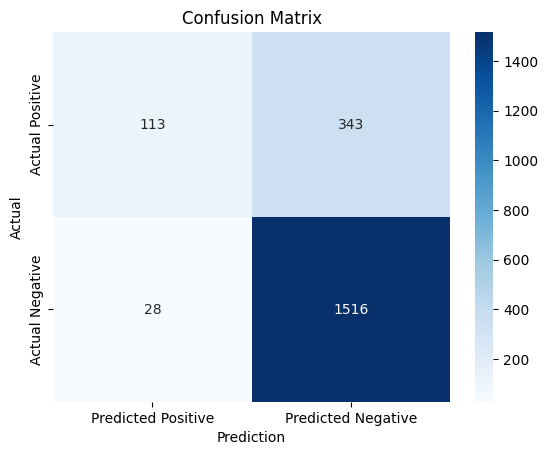

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [37]:
from sklearn.naive_bayes import MultinomialNB
nb_model= MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred= nb_model.predict(X_test)
print(f"The accuracy of Naive Bayes Model is: {accuracy_score(y_test, nb_pred)*100}%")
print(classification_report(y_test, nb_pred))

The accuracy of Naive Bayes Model is: 78.64999999999999%
              precision    recall  f1-score   support

    Negative       0.79      0.99      0.88      1544
    Positive       0.77      0.09      0.16       456

    accuracy                           0.79      2000
   macro avg       0.78      0.54      0.52      2000
weighted avg       0.78      0.79      0.71      2000



Saving the trained model

In [38]:
import joblib

joblib.dump(model, 'eng_log_reg_model.pkl')
joblib.dump(nb_model, 'eng_n_b_model.pkl')
joblib.dump(vectorizer, 'eng_tfidf_vectorizer.pkl')

['eng_tfidf_vectorizer.pkl']

Trying to load and use the saved models


In [39]:
import joblib

model= joblib.load('eng_log_reg_model.pkl')
vectorizer= joblib.load('eng_tfidf_vectorizer.pkl')

Tried using the loaded models to test a random sentence

In [40]:
text='I love weather'
cleaned= english_clean_text(text)
vectorized= vectorizer.transform([cleaned])
prediction= model.predict(vectorized)
print(f"predicted sentiment: {prediction[0]}")

predicted sentiment: Negative
